In [30]:
import sys
sys.path.append('C:/Users/Win 10/AppData/Local/Programs/Python/Python37-32/Lib/site-packages')

In [31]:
import pandas as pd
import pyfolio as pf
from pyfolio import plotting

In [32]:
returns = pd.read_csv('returns.csv',header=None, index_col=0)
positions = pd.read_csv('positions.csv', index_col='Datetime')
transactions = pd.read_csv('transactions.csv', index_col='date')

In [33]:
returns.index.names = ['index']
returns = returns.iloc[:,0]
returns = returns.rename('return')
returns.index = pd.to_datetime(returns.index).tz_convert('UTC')#.strftime('%Y-%m-%dT%H:%M:%S.%f')
returns.dropna(inplace=True)
returns = returns[returns!=0]

In [34]:
returns

index
2012-10-22 00:00:00+00:00   -0.004529
2012-10-23 00:00:00+00:00    0.002611
2012-10-24 00:00:00+00:00   -0.005667
2012-10-25 00:00:00+00:00   -0.020465
2012-10-26 00:00:00+00:00    0.006734
2012-10-29 00:00:00+00:00   -0.009505
2012-10-30 00:00:00+00:00    0.001761
2012-10-31 00:00:00+00:00   -0.002063
2012-11-01 00:00:00+00:00    0.008886
2012-11-02 00:00:00+00:00   -0.037070
2012-11-05 00:00:00+00:00   -0.000323
2012-11-06 00:00:00+00:00   -0.003171
2012-11-07 00:00:00+00:00   -0.000355
2012-11-08 00:00:00+00:00   -0.004693
2012-11-09 00:00:00+00:00    0.000465
2012-11-12 00:00:00+00:00    0.005140
2012-11-13 00:00:00+00:00   -0.008455
2012-11-14 00:00:00+00:00    0.022773
2012-11-15 00:00:00+00:00   -0.005238
2012-11-16 00:00:00+00:00   -0.002053
2012-11-19 00:00:00+00:00   -0.004763
2012-11-20 00:00:00+00:00    0.004376
2012-11-21 00:00:00+00:00    0.009966
2012-11-22 00:00:00+00:00   -0.002858
2012-11-23 00:00:00+00:00    0.006737
2012-11-26 00:00:00+00:00   -0.004735
2012-1

In [35]:
returns = returns/0.8
returns

index
2012-10-22 00:00:00+00:00   -0.005661
2012-10-23 00:00:00+00:00    0.003263
2012-10-24 00:00:00+00:00   -0.007084
2012-10-25 00:00:00+00:00   -0.025581
2012-10-26 00:00:00+00:00    0.008418
2012-10-29 00:00:00+00:00   -0.011881
2012-10-30 00:00:00+00:00    0.002201
2012-10-31 00:00:00+00:00   -0.002579
2012-11-01 00:00:00+00:00    0.011108
2012-11-02 00:00:00+00:00   -0.046337
2012-11-05 00:00:00+00:00   -0.000404
2012-11-06 00:00:00+00:00   -0.003964
2012-11-07 00:00:00+00:00   -0.000443
2012-11-08 00:00:00+00:00   -0.005866
2012-11-09 00:00:00+00:00    0.000582
2012-11-12 00:00:00+00:00    0.006425
2012-11-13 00:00:00+00:00   -0.010568
2012-11-14 00:00:00+00:00    0.028467
2012-11-15 00:00:00+00:00   -0.006547
2012-11-16 00:00:00+00:00   -0.002566
2012-11-19 00:00:00+00:00   -0.005954
2012-11-20 00:00:00+00:00    0.005470
2012-11-21 00:00:00+00:00    0.012458
2012-11-22 00:00:00+00:00   -0.003573
2012-11-23 00:00:00+00:00    0.008422
2012-11-26 00:00:00+00:00   -0.005918
2012-1

In [36]:
try:
    transactions = transactions.index.name = None
except:
    pass

In [37]:
transactions

In [38]:
type(returns.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
returns

index
2012-10-22 00:00:00+00:00   -0.005661
2012-10-23 00:00:00+00:00    0.003263
2012-10-24 00:00:00+00:00   -0.007084
2012-10-25 00:00:00+00:00   -0.025581
2012-10-26 00:00:00+00:00    0.008418
2012-10-29 00:00:00+00:00   -0.011881
2012-10-30 00:00:00+00:00    0.002201
2012-10-31 00:00:00+00:00   -0.002579
2012-11-01 00:00:00+00:00    0.011108
2012-11-02 00:00:00+00:00   -0.046337
2012-11-05 00:00:00+00:00   -0.000404
2012-11-06 00:00:00+00:00   -0.003964
2012-11-07 00:00:00+00:00   -0.000443
2012-11-08 00:00:00+00:00   -0.005866
2012-11-09 00:00:00+00:00    0.000582
2012-11-12 00:00:00+00:00    0.006425
2012-11-13 00:00:00+00:00   -0.010568
2012-11-14 00:00:00+00:00    0.028467
2012-11-15 00:00:00+00:00   -0.006547
2012-11-16 00:00:00+00:00   -0.002566
2012-11-19 00:00:00+00:00   -0.005954
2012-11-20 00:00:00+00:00    0.005470
2012-11-21 00:00:00+00:00    0.012458
2012-11-22 00:00:00+00:00   -0.003573
2012-11-23 00:00:00+00:00    0.008422
2012-11-26 00:00:00+00:00   -0.005918
2012-1

In [40]:
plotting.show_perf_stats(returns)

Start date,2012-10-22
End date,2019-12-09
Total months,84
,Backtest
Annual return,35.1%
Cumulative returns,738.3%
Annual volatility,16.4%
Sharpe ratio,1.92
Calmar ratio,2.02
Stability,0.98
Max drawdown,-17.4%


In [49]:
returns_2018 = returns.iloc[1090:]

In [50]:
plotting.show_perf_stats(returns_2018)

Start date,2017-03-10
End date,2019-12-09
Total months,32
,Backtest
Annual return,38.3%
Cumulative returns,143.1%
Annual volatility,15.4%
Sharpe ratio,2.18
Calmar ratio,2.23
Stability,0.87
Max drawdown,-17.1%


In [51]:
VNINDEX = pd.read_excel('C:\\Users\\Win 10\\Desktop\\Risk_Parity_1211\\VNINDEX.xls', index_col='DATE')
VNINDEX = VNINDEX.rename({'CLOSE':'VNINDEX'}, axis=1)
VNINDEX = VNINDEX.iloc[:,4].pct_change(1)
VNINDEX.index = pd.to_datetime(VNINDEX.index).tz_localize('UTC')

In [52]:
VNINDEX

DATE
2014-01-02 00:00:00+00:00         NaN
2014-01-03 00:00:00+00:00    0.001705
2014-01-06 00:00:00+00:00    0.007381
2014-01-07 00:00:00+00:00    0.002004
2014-01-08 00:00:00+00:00    0.007410
2014-01-09 00:00:00+00:00    0.005993
2014-01-10 00:00:00+00:00    0.003791
2014-01-13 00:00:00+00:00    0.004182
2014-01-14 00:00:00+00:00    0.002303
2014-01-15 00:00:00+00:00    0.008367
2014-01-16 00:00:00+00:00    0.013025
2014-01-17 00:00:00+00:00    0.018836
2014-01-20 00:00:00+00:00    0.018543
2014-01-21 00:00:00+00:00    0.011270
2014-01-22 00:00:00+00:00   -0.014270
2014-01-23 00:00:00+00:00    0.002953
2014-01-24 00:00:00+00:00    0.011995
2014-01-27 00:00:00+00:00   -0.006551
2014-02-06 00:00:00+00:00   -0.003306
2014-02-07 00:00:00+00:00   -0.008870
2014-02-10 00:00:00+00:00    0.011169
2014-02-11 00:00:00+00:00   -0.003598
2014-02-12 00:00:00+00:00    0.018686
2014-02-13 00:00:00+00:00    0.010510
2014-02-14 00:00:00+00:00    0.003578
2014-02-17 00:00:00+00:00   -0.003530
2014-02

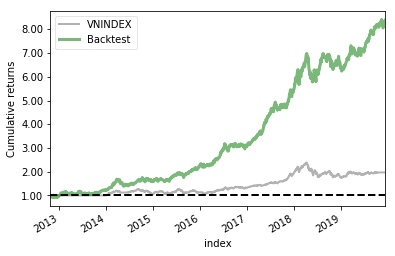

In [53]:
plotting.plot_rolling_returns(returns, factor_returns=VNINDEX)

In [54]:
import matplotlib.pyplot as plt

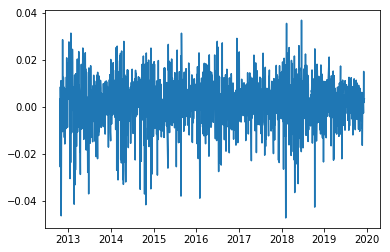

In [56]:
plt.plot(returns)